In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
def calc_box_limit(points):
    centroid_width = points[0]
    centroid_height = points[1]
    width_offset = points[2]//2
    height_offset = points[3]//2
    box_limits = (centroid_width-width_offset,centroid_width+width_offset,centroid_height-height_offset,centroid_height+height_offset)
    return box_limits

In [3]:
def return_duplicate_indices(box_limits):
    discard = []
    for index,boundary in enumerate(box_limits):
        for outer_index,outer_boundary in enumerate(box_limits):
            if outer_index!=index:
                if boundary[0]>=outer_boundary[0] and boundary[1]<=outer_boundary[1] and boundary[2] >= outer_boundary[2] and boundary[3] <= outer_boundary[3]:
                    print("Found duplicate {} inside {}".format(boundary,outer_boundary))
                    discard.append(index)
    return discard

In [4]:
def countours_to_boundingboxes(contours):
    original_detections = []
    for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        area = w*h
        if area>=500: original_detections.append((x,y,w,h))
    return original_detections

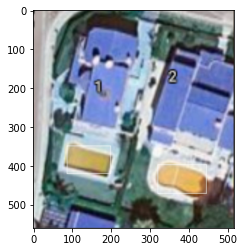

In [5]:
test_img_path = './swimming_pools/Untitled.png'
image = cv2.imread(test_img_path)
plt.imshow(image)

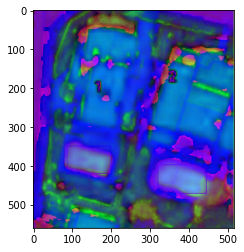

In [6]:
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [7]:
mask = cv2.inRange(hsv,(50,40,140),(120,255,255))
imask = mask>0
pool_blue = np.zeros_like(image,np.uint8)
pool_blue[imask] = image[imask]
contours,_ = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [8]:
original_detections = countours_to_boundingboxes(contours)
box_limits = list(map(calc_box_limit,original_detections))
discard = return_duplicate_indices(box_limits)
final_contours = [item for index,item in enumerate(original_detections) if index not in discard]
for c in final_contours:
    x,y,w,h = c[0],c[1],c[2],c[3]
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

In [9]:
cv2.imshow('result',image)
cv2.waitKey(0)

-1